In [1]:
# ruff: noqa
import sys, os
sys.path.append(os.path.abspath("./../feedback-grape"))
sys.path.append(os.path.abspath("./../"))

# ruff: noqa
from helpers import (
    test_implementations,
    generate_random_discrete_state,
    generate_random_bloch_state,
    generate_excited_state,
    generate_ground_state,
    calculate_baseline,
    calculate_baseline_single_qubit,
)
from plot_helpers import white_outline # Import to register custom plot styles

import jax
import numpy as np
from matplotlib import pyplot as plt

test_implementations()

jax.config.update("jax_enable_x64", True)

In [2]:
fidelities_each, states_each = calculate_baseline(
    N_qubits=1,
    gamma_p=0.0001,
    gamma_m=0.05336699231206307,
    evaluation_time_steps=200,
    batch_size=128,
    generate_state=generate_random_bloch_state,
    key=jax.random.PRNGKey(0),
)

fidelities_each_1, states_each_1 = calculate_baseline_single_qubit(
    gamma_p=0.0001,
    gamma_m=0.05336699231206307,
    evaluation_time_steps=200,
    batch_size=128,
    generate_state=generate_random_bloch_state,
    key=jax.random.PRNGKey(0),
)

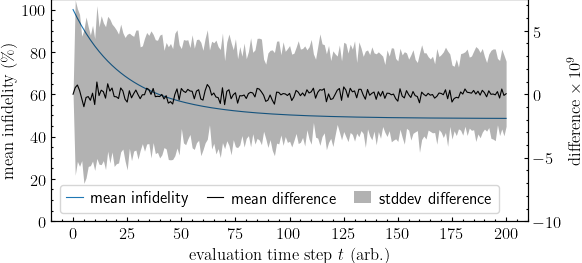

In [6]:
fig, ax = plt.subplots(figsize=(6.1811, 3.0))
ax.set_xlabel("$\\textrm{evaluation time step }t\\textrm{ (arb.)}$")
ax.set_ylabel("$\\textrm{mean infidelity (\\%)}$")
ax.plot(fidelities_each.mean(axis=0)*100, path_effects=white_outline)
ax.set_ylim(0,105)

ax2 = ax.twinx()
diff = np.array(fidelities_each) - np.array(fidelities_each_1)
mean = np.mean(diff, axis=0)
std = np.std(diff, axis=0)
ax2.plot([],[], label = "mean infidelity") # Dummy plot for legend
ax2.plot(mean*1e9, color='black', label='mean difference')
ax2.fill_between(
    np.arange(len(mean)),
    (mean - std)*1e9,
    (mean + std)*1e9,
    color='black',
    alpha=0.3,
    label='stddev difference',
    linewidth=0,
)
ax2.set_ylabel("$\\textrm{difference} \\times 10^9$")
ax2.set_ylim(-10, 7.5)
plt.tight_layout()

ax2.legend(loc='lower left', ncol=3)
fig.savefig("./analytic_vs_numerical.svg")